In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

In [9]:
data = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
features  = [
    #'neighbourhood_group',
   # 'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df = data[features]
"""Checking description of this project's data set"""
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.fillna(0, inplace = True)

<ipython-input-12-cb683e894f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace = True)


In [13]:
from sklearn import preprocessing
d = preprocessing.normalize(df)
names = df.columns
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.100782,-0.183408,0.369432,0.002479,0.022315,0.000521,0.014876,0.904985
1,0.094542,-0.171631,0.521966,0.002320,0.104393,0.000882,0.004640,0.823547
2,0.101120,-0.183220,0.371684,0.007434,0.000000,0.000000,0.002478,0.904431
3,0.114797,-0.208685,0.251122,0.002822,0.761831,0.013092,0.002822,0.547390
4,0.348384,-0.631418,0.683131,0.085391,0.076852,0.000854,0.008539,0.000000


In [14]:
scaled_df['neighbourhood_group']=data['neighbourhood_group']
scaled_df['room_type']=data['room_type']

In [15]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(scaled_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
"""Creating List of Numerical and Categorical columns"""
categorical = [col for col in scaled_df.columns if scaled_df[col].dtype == 'object']
numerical = [col for col in scaled_df.columns if col not in categorical]

In [17]:
"""Correlation of Numerical Columns"""
display(scaled_df[numerical].corr())

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.999993,0.035418,0.097066,-0.049023,0.099383,-0.138071,-0.604378
longitude,-0.999993,1.000000,-0.035591,-0.097102,0.049108,-0.099202,0.138093,0.604525
price,0.035418,-0.035591,1.000000,-0.109314,-0.246696,-0.168406,-0.115321,-0.705891
minimum_nights,0.097066,-0.097102,-0.109314,1.000000,-0.131576,-0.149810,0.122858,-0.015629
number_of_reviews,-0.049023,0.049108,-0.246696,-0.131576,1.000000,0.556354,-0.093425,0.066158
reviews_per_month,0.099383,-0.099202,-0.168406,-0.149810,0.556354,1.000000,-0.067580,0.065042
calculated_host_listings_count,-0.138071,0.138093,-0.115321,0.122858,-0.093425,-0.067580,1.000000,0.117877
availability_365,-0.604378,0.604525,-0.705891,-0.015629,0.066158,0.065042,0.117877,1.000000


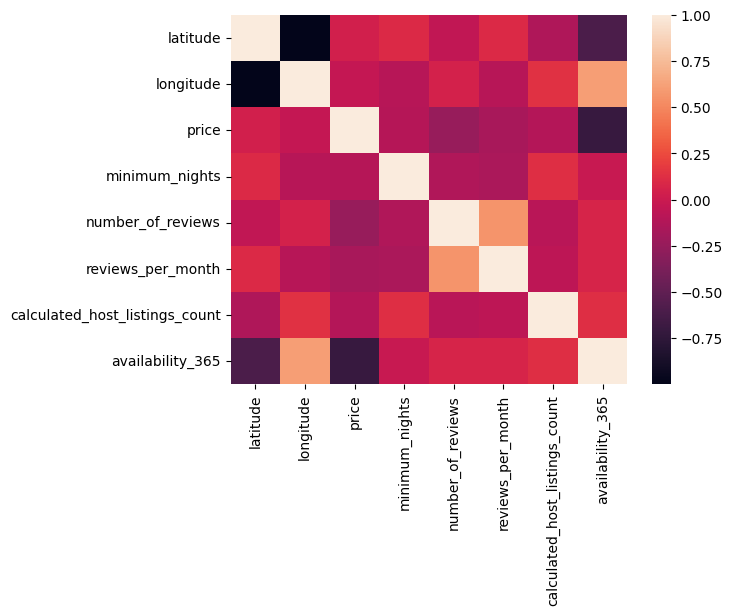

In [18]:
sns.heatmap(scaled_df[numerical].corr());

In [ ]:
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

In [ ]:
"""Taking care of Categorical Variables"""
dv = DictVectorizer(sparse=False)
features = categorical + numerical
features.remove('price')
train_dict = df_train[features].to_dict(orient='records')
val_dict = df_val[features].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -3867610972339.7783
betas = [-6.08909465e-01 -3.49779273e-01 -1.02509317e+01 -5.07833336e+00
 -3.96162033e-01 -1.90341253e+11 -1.90341253e+11 -1.90341253e+11
 -1.90341253e+11 -1.90341253e+11 -3.86738555e-01  2.75540051e+00
  4.05795223e+12  4.05795223e+12  4.05795223e+12]


In [ ]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, random_state= 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores[alpha] = score.round(3)
    print("RMSE with alpha = %s and not rounding to 3 digits: %s"%(alpha, score) )
print(" \nRMSE with rounding off to 3 digits")
print(scores)

RMSE with alpha = 0 and not rounding to 3 digits: 0.0966247313372371
RMSE with alpha = 0.01 and not rounding to 3 digits: 0.09647165596527765
RMSE with alpha = 0.1 and not rounding to 3 digits: 0.09651278193837919
RMSE with alpha = 1 and not rounding to 3 digits: 0.09695974985097709
RMSE with alpha = 10 and not rounding to 3 digits: 0.0981909624074402
 
RMSE with rounding off to 3 digits
{0: 0.097, 0.01: 0.096, 0.1: 0.097, 1: 0.097, 10: 0.098}
